In [10]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from datetime import datetime
import warnings
from sklearn.model_selection import validation_curve, learning_curve
from utils import load_heart_data
import time

## Setup

In [14]:
X, y = load_heart_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=23)

## Base Accuracy

This section will provide the base performance without any specific tuning

In [15]:
dt = DecisionTreeClassifier(random_state=5)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.2f%%' % (accuracy * 100))

Accuracy: 75.41%


## Model Complexity Curve -  max_depth

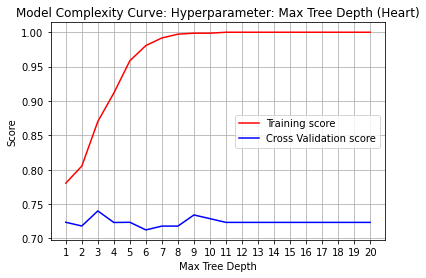

In [21]:
max_depth_range = np.arange(20) + 1
train_scores, test_scores = validation_curve(dt, X_train, y_train, param_name="max_depth", param_range=max_depth_range, cv=5)
train_scores = np.mean(train_scores, axis=1)
test_scores = np.mean(test_scores, axis=1)
plt.figure()
plt.plot(max_depth_range, train_scores, label='Training score', color='r')
plt.plot(max_depth_range, test_scores, label='Cross Validation score', color='b')
plt.title('Model Complexity Curve: Hyperparameter: Max Tree Depth (Heart)')
plt.xticks(max_depth_range)
plt.xlabel('Max Tree Depth')
plt.ylabel('Score')
plt.grid()
plt.legend(loc="best")
plt.show()


## Model Complexity Curve - min_samples_leaf

In [17]:
start_leaf_n = round(0.005 * len(X_train))
end_leaf_n = round(0.05*len(X_train))

min_samples_leaf = np.linspace(start_leaf_n,end_leaf_n,20).round().astype('int')


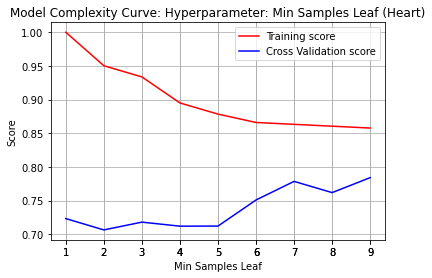

In [22]:
train_scores, test_scores = validation_curve(dt, X_train, y_train, param_name="min_samples_leaf", param_range=min_samples_leaf, cv=5)
train_scores = np.mean(train_scores, axis=1)
test_scores = np.mean(test_scores, axis=1)
plt.figure()
plt.plot(min_samples_leaf, train_scores, label='Training score', color='r')
plt.plot(min_samples_leaf, test_scores, label='Cross Validation score', color='b')
plt.title('Model Complexity Curve: Hyperparameter: Min Samples Leaf (Heart)')
plt.xticks(min_samples_leaf)
plt.xlabel('Min Samples Leaf')
plt.ylabel('Score')
plt.grid()
plt.legend(loc="best")
plt.show()


## Finding Hyperparameters

In [19]:
max_depth_range = np.arange(20) + 1
param_grid = {'min_samples_leaf': min_samples_leaf, 'max_depth': max_depth_range}
tree = GridSearchCV(dt, param_grid=param_grid, cv=5)
t0 = time.time()
dt.get_params().keys()
tree.fit(X_train, y_train)
t1 = time.time()

train_time = t1 - t0
best_dt_params = tree.best_params_

t0 = time.time()
y_pred = tree.predict(X_test)
t1 = time.time()
test_time = t1 - t0
best_accuracy = accuracy_score(y_test, y_pred)

print('Inference time on test data: %f seconds' % test_time)
print('Accuracy of decision tree is %.2f%%' % (best_accuracy * 100))
print('Completed training in %f seconds' % train_time)
print("Best parameters:")
print(best_dt_params)



Inference time on test data: 0.000137 seconds
Accuracy of decision tree is 75.41%
Completed training in 2.573734 seconds
Best parameters:
{'max_depth': 4, 'min_samples_leaf': 9}


## Learning Curve

hello


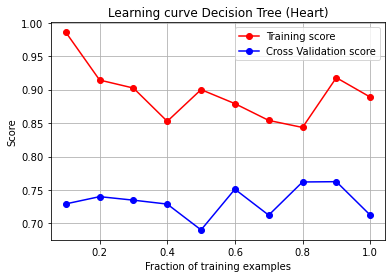

In [23]:
print('hello')
train_sizes = np.linspace(0.1, 1.0, 10)
_, train_scores, test_scores = learning_curve(tree, X_train, y_train, train_sizes=train_sizes, cv=5)

train_scores = np.mean(train_scores, axis=1)
test_scores = np.mean(test_scores, axis=1)
plt.figure()
plt.plot(train_sizes, train_scores, 'ro-', label='Training score')
plt.plot(train_sizes, test_scores, 'bo-', label='Cross Validation score')
plt.title('Learning curve Decision Tree (Heart)')
plt.xlabel('Fraction of training examples')
plt.ylabel("Score")
plt.legend(loc="best")
plt.grid()
plt.show()